In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

import matplotlib.pyplot as plt


# 5732位苏格兰军人胸围数据


In [3]:
df = pd.DataFrame(
    {
        "measurement":[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48],
        "freq":[3,19,81,189,409,753,1062,1082,935,646,313,168,50,18,3,1]
    }
)

<AxesSubplot:xlabel='measurement', ylabel='freq'>

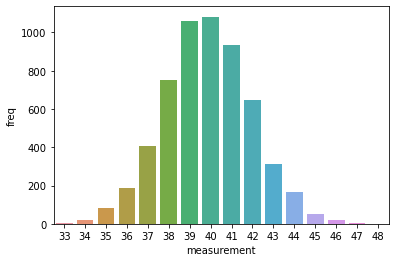

In [7]:
sns.barplot(x="measurement",y="freq",data=df)

平均值

In [32]:
DescrStatsW(data = df["measurement"],weights=df["freq"],ddof=1).mean

39.848918353105375

标准差

In [27]:
DescrStatsW(data = df["measurement"],weights=df["freq"],ddof=1).std

2.0733859284943357

# 一般正态分布

标准差一样，均值不同

<AxesSubplot:ylabel='Density'>

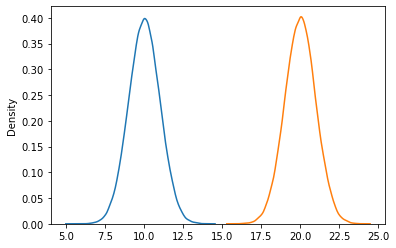

In [10]:
# 生成样本量为10000服从标准正态分布的数值
x_1 = np.random.normal(10,1, size = 100000)
sns.kdeplot(x_1)

x_2 = np.random.normal(20,1, size = 100000)
sns.kdeplot(x_2)

均值相等，标准差不同

<AxesSubplot:ylabel='Density'>

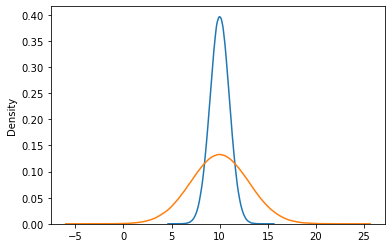

In [78]:
x_3 = np.random.normal(10,1, size = 1000000)
sns.kdeplot(x_3)

x_4 = np.random.normal(10,3, size = 1000000)
sns.kdeplot(x_4)

# 标准正态分布

<AxesSubplot:ylabel='Density'>

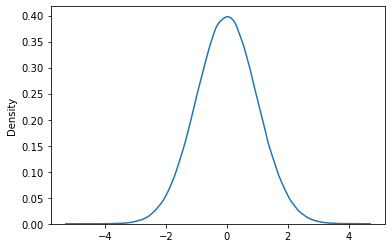

In [9]:
# 生成样本量为1000000服从标准正态分布的数值
normal_data = np.random.normal(0,1, size = 1000000)
sns.kdeplot(normal_data)

# 计算Z值

如果X是服从均值为100，标准差为50的正态分布。给定X=200，计算其Z分数（Z-score）：

In [68]:
z = (200-100)/50
z

2.0

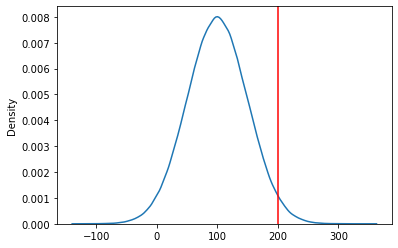

In [11]:
mydata = np.random.normal(100,50, size = 1000000)
sns.kdeplot(mydata)
plt.axvline(x=200, color='red')


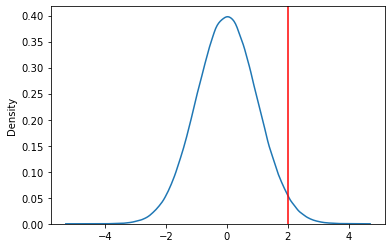

In [10]:
sns.kdeplot(normal_data)
plt.axvline(x=2, color='red')

In [7]:
# 写下正态分布的均值与标准差

mu = 0
sigma = 1

In [8]:
# 计算P(Z < 2.00) 

z = 2

prob = stats.norm.cdf(z,mu,sigma)
prob

0.9772498680518208

## 统计学 VS 经济学 哪一门课的班级排名比较好

小明的统计学67分，平均为65分，标准差10分
经济学72分，平均为75分，标准差5分

In [13]:
stat_score = (67-65)/10
econ_score = (72-75)/5

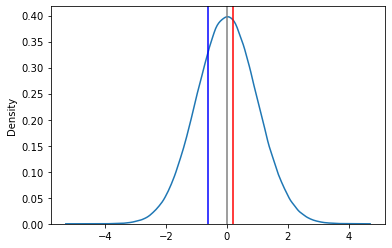

In [14]:
from cProfile import label


sns.kdeplot(normal_data)
plt.axvline(x=stat_score, color='red')
plt.axvline(x=econ_score, color='blue')
plt.axvline(x=0, color='gray')

## X代表的是网络下载图片所需要的时间（单位为秒）
## 假如X服从均值为18.0，标准差为5.0的正态分布。

In [100]:
mydist = statistics.NormalDist(mu = 18, sigma = 5)

**求P(X < 18.6)**

In [101]:
mydist.cdf(18.6)

0.547758426020584

**求P(X > 18.6)**

In [102]:
1 -mydist.cdf(18.6)

0.452241573979416

**求P(18 < X < 18.6)**

In [103]:
mydist.cdf(18.6) - mydist.cdf(18) 

0.047758426020584

**求P(17.4 < X < 18)**

In [105]:
mydist.cdf(18) - mydist.cdf(17.4) 

0.047758426020584

## 假如人群的智商服从正态分布，且均值μ=100，标准差σ=10. 


In [90]:
dist = statistics.NormalDist(mu = 100, sigma = 10)

**（1）电影《阿甘正传》的主角阿甘的智商为75，请算一下比他聪明的人有多少？（说出百/千分比）**

In [98]:
1 - dist.cdf(75)

0.9937903346742238

**（2）据说高智商俱乐部门萨俱乐部的入会门槛为智商位于人群的前2%,请算一下智商位于人群的前2%的智商值为多少？**

In [99]:
dist.inv_cdf(p=0.98)

120.53748910631822

**（3）如果我们把低于平均值1.96个标准差（Z = -1.96）至高于平均值1.96个标准差（Z = 1.96）的群体定义为普通人（占全部人口的95%），请算一算普通人智商的上下限。**

In [55]:
limit_1 = -1.96*sigma + mu
limit_2 = 1.96*sigma + mu
limit_1,limit_2

(80.4, 119.6)

**（4）在80-120的范围内随机抽取两个整数（记为a和b,且a<b），请计算智商为a~b的人口占全部人口的多少？[即求P(a < X < b)]**

In [94]:
mylist = list(range(80,121))
num_1 = np.random.choice(mylist,1)
num_2 = np.random.choice(mylist,1)
num_1,num_2

(array([86]), array([120]))

In [95]:
dist.cdf(num_2) - dist.cdf(num_1)

0.8964932088180498